## Introduction  

In this mini workshop, we are going to learn some advanced features in [scikit-learn](https://scikit-learn.org/stable/user_guide.html) that can improve your undersanding and efficiency of machine learning.  

This time, we will use a built-in dataset from scikit-learn as an example for our exercise. The dataset we are using is the [Boston house price](https://scikit-learn.org/stable/datasets/index.html#toy-datasets) dataset for regression modeling. 

Let's start the notebook with importing the package and the data.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.datasets import load_boston

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
X, y = load_boston(return_X_y=True)
print(X.shape, y.shape)

(506, 13) (506,)


It looks like we have 13 features that we  can use to create a predictive model for the target/output which is the house price in Boston.

## Pipeline  

In the past two days, we are doing the model development step-by-step with the typical process of:

1. Feature selection/transformation;
2. Defining the model;
3. Tunning model hyperparameters;

This is a clear way to start our learning of each individual step. However, the code will look lengthy. In scikit-learn, you can create a model [pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators) to nest all model steps into a sequence and specifying the key words for each step. You can also implement grid search CV directly to your pipeline.

In [12]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
## First, let's review a traditional modeling process

## Step 1. Data transformation - e.g., PCA
## pcaModel = PCA()
## pcaData = pcaModel.fit_transform(X)

## Step 2. Defining the model
## rfModel = RandomForestTRegressor(...)

## Step 3. Gridsearch CV
## gridsearch_obj = {
##     rfModel,
##     param_grid,
##     cv,
##     ...   
## }

## Step 4. fit the model/grid search

## Step 5. find the best combo & final model

## ...

## Things can be simplified with pipeline by nesting these together
pca = PCA()
rfModel = RandomForestRegressor()

## making the pipeline
pipe = Pipeline(steps=[('reduce_dim', pca), ('regression', rfModel)])

print( pipe )

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('regression',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                 

In [25]:
## Now, le's say we want to change how many different PCA components we want to include in our final model 
## also, we want to change the number of estimators (trees) in our random forest
param_grid = {
    'reduce_dim__n_components': [6, 7, 8, 9, 10, 11, 12],
    'regression__n_estimators': [50,100,200,300]
}

## now we can define the gridsearch object that we want (say with 10-fold cross validation)
gridsearch_obj = GridSearchCV(
    pipe,
    param_grid,
    cv=KFold(n_splits=10),
    n_jobs=-1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print( X_train.shape, y_train.shape )
print(gridsearch_obj)

(379, 13) (379,)
GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('reduce_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('regression',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_fe...
          

In [26]:
## Now we can fit the whole pipeline instead of just doing it step by step
gridsearch_obj.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('reduce_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('regression',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_fe...
                           

In [27]:
## Let's looks at what is the suggestion of the model structure
print( gridsearch_obj.best_params_)
print( gridsearch_obj.best_score_)

{'reduce_dim__n_components': 11, 'regression__n_estimators': 50}
0.7767816443489


0.7102048231329757 4.365109395135025


Text(0, 0.5, 'Predicted Median House Value (1,000 USD)')

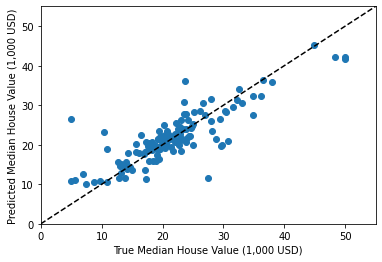

In [36]:
## Now we can directly apply the model pipeline from the grid search 
## object to our testing data which will give us the best estimator
## based on our grid search CV results.
from sklearn.metrics import r2_score, mean_squared_error

y_predicted = gridsearch_obj.predict(X_test)

r2 = r2_score(y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

print(r2, rmse)

## We can also add the scatter plot between predicted and test data
plt.scatter(y_test, y_predicted)
plt.plot([0,55],[0,55],'k--')
plt.xlim(0,55)
plt.ylim(0,55)
plt.xlabel('True Median House Value (1,000 USD)')
plt.ylabel('Predicted Median House Value (1,000 USD)')

In [ ]:
### Now it's your turn to try build your own pipeline for building a model 
### for this Boston Housing Price data using neural network.
### For the hyperparameters, you can change both the number of hidden layers
### for 1-layer and 2-layer models, as well as the activation function






## Random Search for Hyperparameters

In the previous exercise, we always use the grid search method to find the best model hyperparameters. This is a good method when you have a limited number of hyperparameters and small range of the parameters to tune. However, when we have a large parameter space for searching, the grid search can be really time consuming for large data sets. Sometimes, random search can help you reduce the computational need for that. We are going to use random forest model as our base model again here.

In [37]:
## define our base model pipeline
pipebase = Pipeline(steps=[('reduce_dim', PCA(n_components=11)), 
                           ('regression', RandomForestRegressor())])
print( pipebase )

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=11,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('regression',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                   

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

## In this situation, we can define a grid for our search
param_grid = {
    'regression__n_estimators': np.linspace(10, 100, num=10, dtype='int16'),
    'regression__max_features': np.linspace(3, 11, num=5, dtype='int16'),
    'regression__min_samples_leaf': [1,3,5]
}

print(param_grid)

## Now we can perform our grid search with 5-fold cross validation
grid_search = GridSearchCV(pipebase, param_grid=param_grid,
                           cv=KFold(n_splits=5))
start = time()
grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)



{'regression__n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100], dtype=int16), 'regression__max_features': array([ 3,  5,  7,  9, 11], dtype=int16), 'regression__min_samples_leaf': [1, 3, 5]}
GridSearchCV took 78.92 seconds for 150 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.797 (std: 0.108)
Parameters: {'regression__max_features': 11, 'regression__min_samples_leaf': 1, 'regression__n_estimators': 60}

Model with rank: 2
Mean validation score: 0.796 (std: 0.087)
Parameters: {'regression__max_features': 9, 'regression__min_samples_leaf': 1, 'regression__n_estimators': 50}

Model with rank: 3
Mean validation score: 0.795 (std: 0.098)
Parameters: {'regression__max_features': 9, 'regression__min_samples_leaf': 1, 'regression__n_estimators': 100}



In [47]:
## Now let's see how the random search will take for us
import scipy.stats as stats
## here we define the range for search first
param_dist = {
    'regression__n_estimators': stats.randint(10,100),
    'regression__max_features': stats.randint(3,11),
    'regression__min_samples_leaf': stats.randint(1,5) 
}
print(param_dist)


{'regression__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2262c94278>, 'regression__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2262c94e48>, 'regression__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2262c940b8>}


In [48]:

## run randomized search
n_iter_search = 75
random_search = RandomizedSearchCV(pipebase, param_distributions=param_dist,
                                   n_iter=n_iter_search)
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 38.93 seconds for 75 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.795 (std: 0.085)
Parameters: {'regression__max_features': 10, 'regression__min_samples_leaf': 1, 'regression__n_estimators': 76}

Model with rank: 2
Mean validation score: 0.788 (std: 0.097)
Parameters: {'regression__max_features': 5, 'regression__min_samples_leaf': 1, 'regression__n_estimators': 32}

Model with rank: 3
Mean validation score: 0.784 (std: 0.101)
Parameters: {'regression__max_features': 7, 'regression__min_samples_leaf': 1, 'regression__n_estimators': 82}



## Assessing feature importance  

Assuming that we finally find our best random forest model. We want to know which features have higer importance than others. What we can do is to use the [permutation feature importance](https://scikit-learn.org/stable/modules/permutation_importance.html#) functionality in scikit-learn.


In [ ]:
## Now, let's use the model hyperparameter from our random search as the final model

rfModel = RandomForestRegressor(n_estimators=76, min_samples_leaf=1, max_features=10)
rfModel.fit(X_train, y_train)

house = load_boston()
## Let's calculate feature importance here
from sklearn.inspection import permutation_importance
r = permutation_importance(rfModel, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

print (r)

In [ ]:
## We want to visualize the ranking of individual features
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{house.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
 